In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
dataset = pd.read_csv('classification_data/Social_Network_Ads.csv').values

In [15]:
X = dataset[:,:-1]
y = dataset[:,-1]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = sc.transform(X_train)

### SVM

In [18]:
from sklearn.svm import SVC
svm_poly = SVC(kernel='poly',degree=2,C=1,coef0=1)
svm_poly.fit(X_train_sc,y_train)

SVC(C=1, coef0=1, degree=2, kernel='poly')

In [19]:
X_test_sc = sc.transform(X_test)
y_pred_poly = svm_poly.predict(X_test_sc)

In [20]:
from sklearn.metrics import accuracy_score
acc_poly = accuracy_score(y_test,y_pred_poly)
print('Polynomial SVM accuracy: ', acc_poly*100)

Polynomial SVM accuracy:  92.0


### 2D 시각화

In [21]:
print(X[:,0].min(),X[:,0].max())
print(X[:,1].min(),X[:,1].max())

18 60
15000 150000


In [22]:
x0 = np.linspace(15,65,500)
x1 = np.linspace(10000,160000,500)

In [23]:
X0,X1 = np.meshgrid(x0,x1)

In [24]:
X0_age = X0.reshape(-1,1)
X1_sal = X1.reshape(-1,1)

coord = np.concatenate((X0_age,X1_sal),axis=1)

In [25]:
coord_sc = sc.transform(coord)
poly_pred = svm_poly.predict(coord_sc)

In [26]:
X_train0 = X_train[y_train==0,:]
X_train1 = X_train[y_train==1,:]

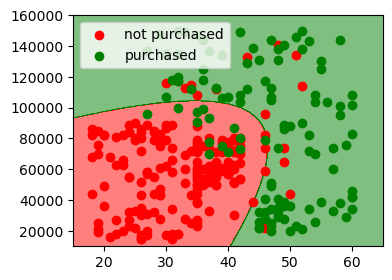

In [27]:
from matplotlib.colors import ListedColormap
class_color = ListedColormap(('red','green'))
plt.figure(figsize=(4,3))
plt.contourf(X0,X1,poly_pred.reshape(X0.shape),cmap=class_color,alpha=0.5)
plt.scatter(X_train0[:,0],X_train0[:,1],color='red',label='not purchased')
plt.scatter(X_train1[:,0],X_train1[:,1],color='green',label='purchased')
plt.legend()